In [3]:
%load_ext autoreload
%autoreload 2

[autoreload of pandas failed: Traceback (most recent call last):
  File "/home/dslab/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/dslab/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 434, in superreload
    module = reload(module)
  File "/home/dslab/anaconda3/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/dslab/anaconda3/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/dslab/anaconda3/lib/python3.7/site-packages/pandas/__init__.py", line 22, in <module>
    from pandas.compat.numpy import (
ImportError: cannot import name '_np_version_under

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of pandas.core.reshape.melt failed: Traceback (most recent call last):
  File "/home/dslab/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/dslab/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/home/dslab/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/home/dslab/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 266, in update_function
    setattr(old, name, getattr(new, name))
ValueError: lreshape() requires a code object with 0 free vars, not 5
]
[autoreload of pandas.io.excel._base failed: Traceback (most recent call last):
  File "/home/dslab/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_ob

In [2]:
import pandas as pd
import os
import matplotlib
from dataprep.eda import plot,plot_correlation
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'dataprep'

In [3]:
os.chdir('..')

In [4]:
perfiles = pd.read_parquet('data/raw/flex_perfiles_usuario.parquet')

In [5]:
perfiles.dtypes

idPerfiles                     int64
idUsuario                      int64
nombre                        object
descripcion                   object
fecha                 datetime64[ns]
funcion_ergonomica             int64
altura                        object
peso                          object
sexo                          object
posicion                      object
activo                         int64
presiones                     object
dtype: object

In [6]:
perfiles.loc[perfiles["posicion"]=="manual","posicion"] = "Manual"

In [7]:
perfiles

,idPerfiles,idUsuario,nombre,descripcion,fecha,funcion_ergonomica,altura,peso,sexo,posicion,activo,presiones
0,1,2,prueba 1 manual,,2017-06-28 11:09:51,2,180,74,Male,Lateral,1,112222111122
1,2,2,Charly,,2017-06-29 09:53:38,0,180,73,Male,Lateral,1,112222321122
2,3,2,Aini,,2017-06-29 09:54:57,0,160,55,Female,Lateral,0,002221122222
3,4,2,A Prueba perfil,prueba,2017-06-29 18:08:35,0,180,75,Male,Lateral,0,001122334455
4,7,2,prueba res perfil,,2017-06-29 18:55:53,0,183,73,Male,Lateral,1,112223321122
...,...,...,...,...,...,...,...,...,...,...,...,...
7763,7804,771,todo 6,Manual,2020-05-18 18:09:52,2,170,83,Manual,Manual,1,55555555333
7764,7805,547,todo 6,Manual,2020-05-18 23:05:46,2,176,90,Manual,Manual,1,55555555333
7765,7806,703,firme,Manual,2020-05-19 08:06:28,2,178,74,Manual,Manual,1,55555555333
7766,7807,1212,Ana. I. 6,-,2020-05-19 18:11:38,0,159.0,54.0,Female,Lateral,1,002221112222


In [8]:
for col in ["altura", "peso"]:
    perfiles[col] = perfiles[col].str.replace(',', '.')

In [9]:
perfiles[["altura", "peso"]] = perfiles[["altura", "peso"]].apply(pd.to_numeric)

In [10]:
plot(perfiles)

In [11]:
plot(perfiles,"altura",bins=50)

In [12]:
plot(perfiles[(perfiles["altura"]>100) & (perfiles["altura"]<220) ],"altura",bins=50)

In [13]:
plot(perfiles[(perfiles["peso"]<150) & (perfiles["peso"]!=0)],"peso",bins=50)

In [15]:

perfiles_filtrado = perfiles[(perfiles["activo"]==1) &(perfiles["peso"]<150) & (perfiles["peso"]!=0 )& (perfiles["altura"]>100) & (perfiles["altura"]<220)]

plot(perfiles_filtrado,"altura","peso")

In [16]:
plot_correlation(perfiles_filtrado)

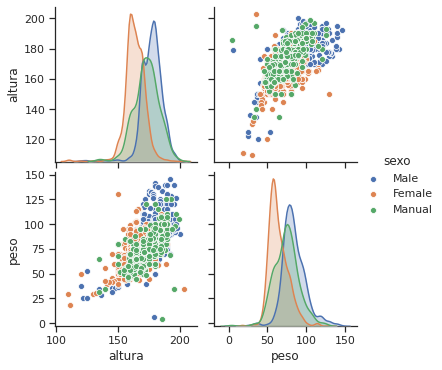

In [17]:
sns.set(style="ticks")
sns.pairplot(perfiles_filtrado[["altura","peso","sexo"]], hue="sexo");

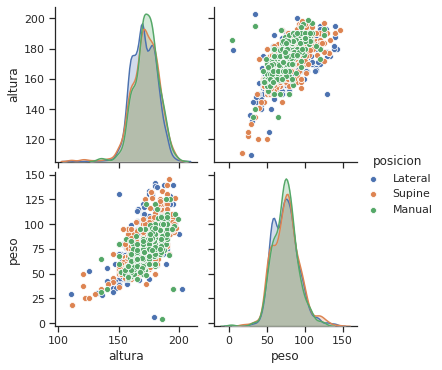

In [18]:
sns.set(style="ticks")
sns.pairplot(perfiles_filtrado[["altura","peso","posicion"]], hue="posicion");

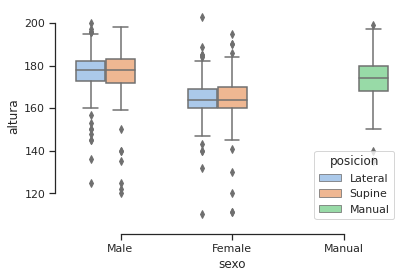

In [19]:
sns.set(style="ticks", palette="pastel")

sns.boxplot(x="sexo", y="altura",
            hue="posicion",
            data=perfiles_filtrado)
sns.despine(offset=10, trim=True)

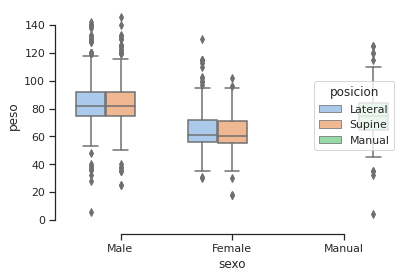

In [20]:

sns.boxplot(x="sexo", y="peso",
            hue="posicion",
            data=perfiles_filtrado)
sns.despine(offset=10, trim=True)